In [9]:
import pandas as pd
import numpy as np

In [10]:
# Load the dataset
data = pd.read_csv("AirfoilSelfNoise.csv")

# Randomly shuffle the dataset
data_shuffled = data.sample(frac=1)  # Adjust the random_state as desired for reproducibility

In [11]:
# Create a random test set of 100 lines
test_set = data_shuffled.sample(n=100)  # Adjust the random_state as desired for reproducibility

# Remove the test set from the shuffled data
remaining_data = data_shuffled.drop(test_set.index)

# Create a validation set with 20% of the remaining data
validation_set = remaining_data.sample(frac=0.2)

# Remove the validation set from the remaining data
training_set = remaining_data.drop(validation_set.index)

In [12]:
# Save the sets to separate CSV files
test_set.to_csv("test_set.csv", index=False)
validation_set.to_csv("validation_set.csv", index=False)
training_set.to_csv("training_set.csv", index=False)

c:\Users\LEGION\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\LEGION\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\LEGION\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


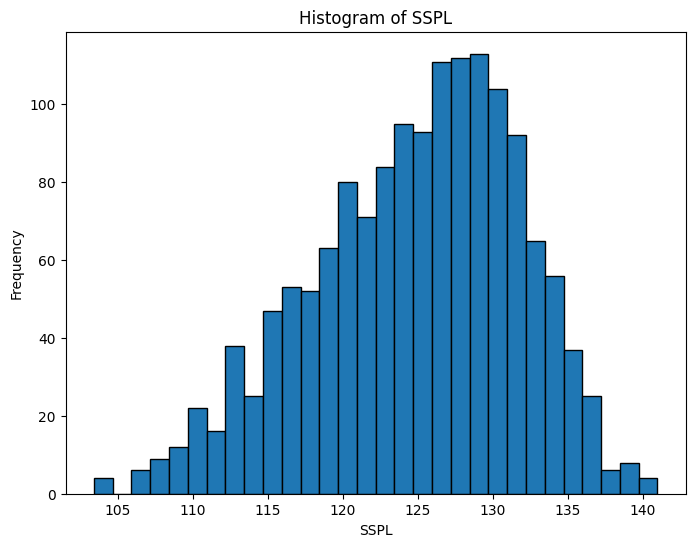

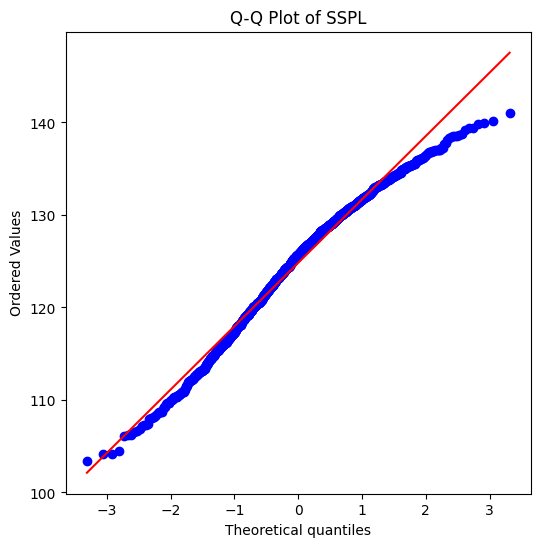

Shapiro-Wilk Test:
Statistic: 0.9830779433250427
p-value: 2.725544616388742e-12


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the dataset
data = pd.read_csv("AirfoilSelfNoise.csv")

# Extract the SSPL column
sspl_data = data['SSPL']

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(sspl_data, bins=30, edgecolor='k')
plt.xlabel('SSPL')
plt.ylabel('Frequency')
plt.title('Histogram of SSPL')
plt.show()

# Create a Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(sspl_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of SSPL')
plt.show()

# Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(sspl_data)
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

In [10]:
import numpy as np

# Extract the SSPL column
sspl_data = data['SSPL']

std = np.std(sspl_data)

print("Standard Deviation:", std)

# Calculate the IQR
q1 = np.percentile(sspl_data, 25)
q3 = np.percentile(sspl_data, 75)
iqr = q3 - q1

print("Interquartile Range (IQR):", iqr)

median = np.median(sspl_data)

acceptable_range = (median - (0.5 * iqr), median + (0.5 * iqr))

true_value = 135  # Replace with the actual true value
multiplier = 0.035
range_value = multiplier * true_value
acceptable_range = (true_value - iqr*0.5 , true_value + iqr*0.5)

print(acceptable_range)

6.896361277488788
Interquartile Range (IQR): 9.80449999999999
(130.09775000000002, 139.90224999999998)
